In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [33]:
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
import shap

In [13]:
# Setting params for plots
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [14]:
iris = load_iris()
features = iris.data
label = iris.target

In [15]:
df = pd.DataFrame(features)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df['target'] = label

In [17]:
df.head()

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [32]:
df.describe()

,0,1,2,3,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


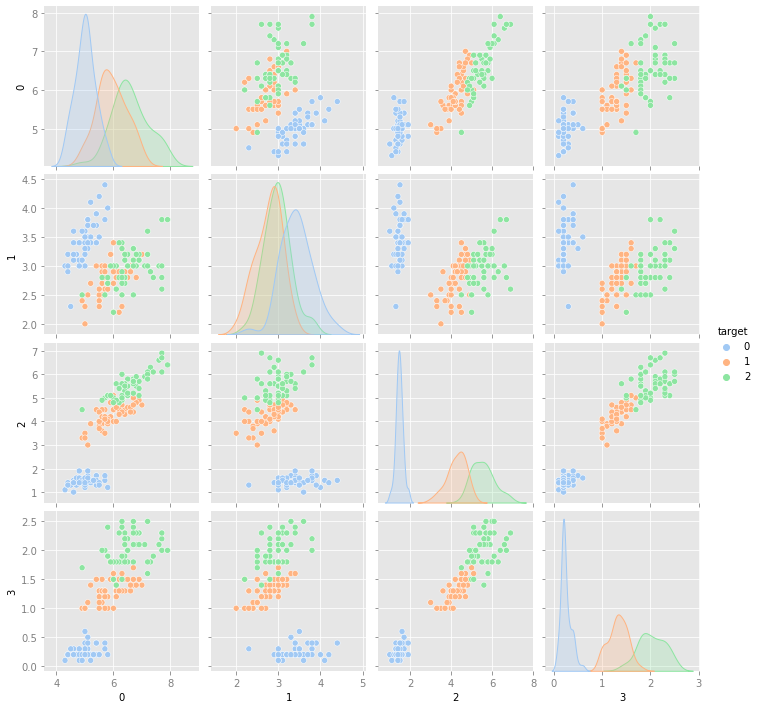

In [31]:
sns.pairplot(df, hue='target', palette='pastel');

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=42)

In [64]:
# Creating and fitting our dummy classifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Creating our y_pred variable
y_pred = dummy.predict(X_test)

# We need to one-hot encode our classes from our generated labels in order for
# The confusion matrix to be able to digest any of it
y_pred = np.argmax(y_pred, axis=1)
y_test_ohe = np.argmax(y_test, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [50]:
params = {'n_estimators': [10, 50, 100, 200], 
          'criterion': ['gini', 'entropy'], 
          'max_depth': [3, 5, 10, None], 
          'min_samples_leaf': [1, 2, 5, 10]}

In [51]:
forest = RandomForestClassifier()

In [36]:
clf = GridSearchCV(estimator=forest, param_grid=params)

In [52]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [53]:
best_params = clf.best_params_

In [54]:
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 10,
 'n_estimators': 50}

In [55]:
best_forest = RandomForestClassifier(**best_params)

In [65]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Definition:
    fits model on the training set and evaluates the model on the testing set.
    Prints out classification report along with a confusion matrix.
    
    Args:
    model: Required. A model to evaluate.
    X_train: Required. Features of the training set
    y_train: Required. Labels of the training set
    X_test: Required. Features of the testing set
    y_test: Required. Labels of the testing set
    
    Returns:
    A Classification report and confustion matrix of model evaluation on the test
    set.    
    """
    
    fit_model = model.fit(X_train, y_train)
    # creating y_pred values for train and test sets
    y_hat_test = fit_model.predict(X_test)
    y_hat_train = fit_model.predict(X_train)
    # comparing accuracy and recall score s of the train and test sets
    print(f"Train accuracy score: {metrics.accuracy_score(y_train, y_hat_train)}")
    print(f"Test accuracy score: {metrics.accuracy_score(y_test, y_hat_test)}")
    
    # printing out classification report and plotting confusion matrix
    print("Classification Report")
    print('---' * 8)
    classification_report(y_test, y_hat_test)
    plot_confusion_matrix(fit_model, X_test,y_test,normalize='true',cmap='Reds');
    
    ## Plot Roc Curve on second ax
#     plt.figure(figsize=(7, 7))
#     roc_plot = plot_roc_curve(fit_model, X_test, y_test)
#     plt.legend()
#     # Threshold line
#     plt.plot([0,1],[0,1],ls=':')
#     plt.title('ROC Curve')
#     plt.show()

Train accuracy score: 0.9553571428571429
Test accuracy score: 1.0
Classification Report
------------------------


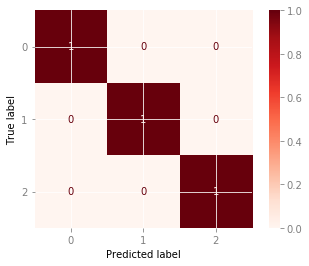

In [66]:
evaluate_model(best_forest, X_train, y_train, X_test, y_test)